# Room Cancellation Classification

In this assignment, you will be performing EDA and predictive modelling on a dataset of hotel reservations. The dataset is available from the attached `hotel_bookings.csv` file.

In this Jupyter notebook, please, document your results and the way you have obtained them. The results of each sub-question should be printed as the result of its corresponding cell.
Please make sure that the datasets and other outputs are easily identifiable, i.e. use descriptive names for as is suitable for each corresponding question.
Give your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner. _Please do not change the general structure of this notebook_. You can, however, **add additional markdown or code cells** if necessary. <b>Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting! </b>

**Submission instructions**:
For submission, make a zip file containing your notebook and the attached dataset and name it as `<your_roll_number>_a3.zip` 

In [1]:
# Add all imports here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("hotel_bookings.csv")

## Data Description

[Original Source](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-11/readme.md)

This data consists of room reservations for two hotels: (i) a city hotel and (ii) a resort hotel. The columns are described as follows:

|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
|hotel                          |character | Hotel (H1 = Resort Hotel or H2 = City Hotel) |
|is_canceled                    |double    | Value indicating if the booking was canceled (1) or not (0) |
|lead_time                      |double    | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date |
|arrival_date_year              |double    | Year of arrival date|
|arrival_date_month             |character | Month of arrival date|
|arrival_date_week_number       |double    | Week number of year for arrival date|
|arrival_date_day_of_month      |double    | Day of arrival date|
|stays_in_weekend_nights        |double    | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel |
|stays_in_week_nights           |double    |  Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel|
|adults                         |double    | Number of adults|
|children                       |double    | Number of children|
|babies                         |double    |Number of babies |
|meal                           |character | Type of meal booked. Categories are presented in standard hospitality meal packages: <br> Undefined/SC – no meal package;<br>BB – Bed & Breakfast; <br> HB – Half board (breakfast and one other meal – usually dinner); <br> FB – Full board (breakfast, lunch and dinner) |
|country                        |character | Country of origin. Categories are represented in the ISO 3155–3:2013 format |
|market_segment                 |character | Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
|distribution_channel           |character | Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
|is_repeated_guest              |double    | Value indicating if the booking name was from a repeated guest (1) or not (0) |
|previous_cancellations         |double    | Number of previous bookings that were cancelled by the customer prior to the current booking |
|previous_bookings_not_canceled |double    | Number of previous bookings not cancelled by the customer prior to the current booking |
|reserved_room_type             |character | Code of room type reserved. Code is presented instead of designation for anonymity reasons |
|assigned_room_type             |character | Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons |
|booking_changes                |double    | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation|
|deposit_type                   |character | Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:<br>No Deposit – no deposit was made;<br>Non Refund – a deposit was made in the value of the total stay cost;<br>Refundable – a deposit was made with a value under the total cost of stay. |
|agent                          |character | ID of the travel agency that made the booking |
|company                        |character | ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons |
|days_in_waiting_list           |double    | Number of days the booking was in the waiting list before it was confirmed to the customer |
|customer_type                  |character | Type of booking, assuming one of four categories:<br>Contract - when the booking has an allotment or other type of contract associated to it;<br>Group – when the booking is associated to a group;<br>Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;<br>Transient-party – when the booking is transient, but is associated to at least other transient booking|
|adr                            |double    | Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights |
|required_car_parking_spaces    |double    | Number of car parking spaces required by the customer |
|total_of_special_requests      |double    | Number of special requests made by the customer (e.g. twin bed or high floor)|
|reservation_status             |character | Reservation last status, assuming one of three categories:<br>Canceled – booking was canceled by the customer;<br>Check-Out – customer has checked in but already departed;<br>No-Show – customer did not check-in and did inform the hotel of the reason why |
|reservation_status_date        |double    | Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel|


## Part 0

The `children`, `adults` and `babies` columns cannot have a value of zero simultaneously. Filter out the rows, which show this behavior

In [42]:
# Your code here
print(df.shape)
df_refined=df[(df.adults!= 0) | (df.children !=0) | (df.babies !=0)]
df_refined

(119390, 32)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


## Part A - EDA

To make ourselves familiar with the data, we will start with an explorative data analysis. In this part, you will be making different visualizations to support your answers.

For each sub-question, a separate and single subplot should be shown. You also need to decide the optimal visualization for each case and use that.

### Question 1

#### (a)
Determine and visualize the top 10 countries and guest counts from which the maximum number of guests are coming from.

#### (b)
Repeat (a) but show the guest counts for the citydfcities.index and resort hotels separately. They both should be shown in the same plot

#### (c)
Repeat (b) for the non-cancelled bookings


Each part should be done in a separate cell

In [4]:
#preprocessing for question a
df_refined['children']=df_refined['children'].fillna(0)
df2=df_refined[['children','adults','babies','country','hotel','is_canceled']]
df2['no_of_guest']=df2['children']+df2['adults']+df2['babies']
df2.dropna(inplace=True)
#df2.isnull().sum()

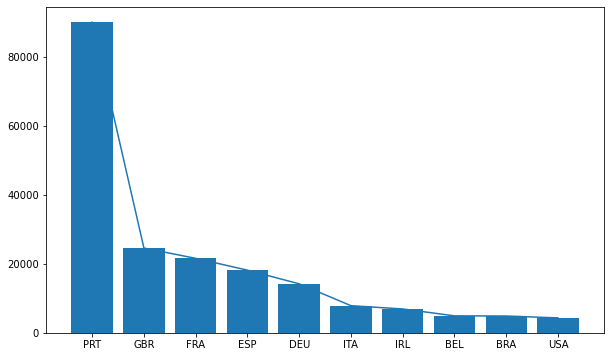

In [5]:
plt.figure(figsize=(10,6))
df3=df2.groupby('country').sum()
df4=df3.sort_values(by='no_of_guest',ascending=False)[0:10]
plt.bar(df4.index,df4.no_of_guest)
plt.plot(df4.index,df4.no_of_guest)

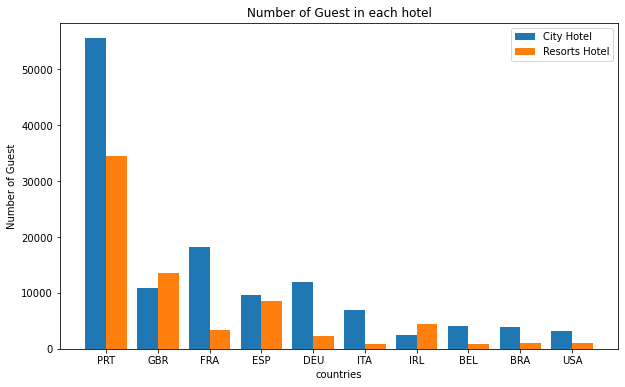

In [7]:
plt.figure(figsize=(10,6))
top10countries = list(df2.groupby('country').sum().sort_values(by='no_of_guest',ascending=False)[0:10].index)
city_hotel=[]
resort_hotel=[]

for country_name in top10countries:
    #print(country_name)
    hotel_groupd=df2[df2['country']==country_name].groupby('hotel').sum()
    #print(hotel_groupd)
    #print(hotel_groupd['no_of_guest'].loc['City Hotel'])
    city_hotel.append(hotel_groupd['no_of_guest'].loc['City Hotel'])
    resort_hotel.append(hotel_groupd['no_of_guest'].loc['Resort Hotel'])
    
X_axis = np.arange(len(top10countries))
  
plt.bar(X_axis - 0.2, city_hotel, 0.4, label = 'City Hotel')
plt.bar(X_axis + 0.2, resort_hotel, 0.4, label = 'Resorts Hotel')
plt.xticks(X_axis, top10countries)
plt.xlabel("countries")
plt.ylabel("Number of Guest")
plt.title("Number of Guest in each hotel")
plt.legend()
plt.show()

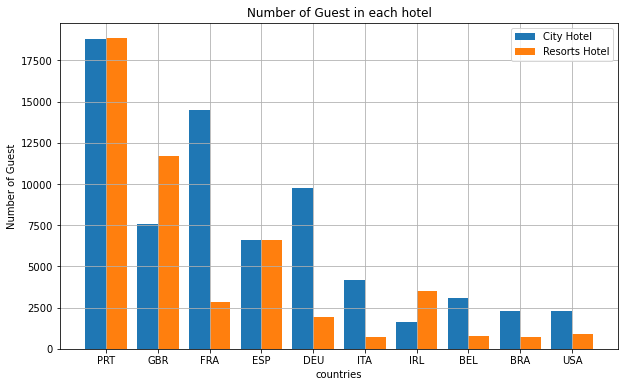

In [9]:
plt.figure(figsize=(10,6))
plt.grid()
top10countries = list(df2.groupby('country').sum().sort_values(by='no_of_guest',ascending=False)[0:10].index)
city_hotel=[]
resort_hotel=[]

for country_name in top10countries:
    #print(country_name)
    hotel_groupd=df2[(df2['country']==country_name) & (df2['is_canceled']==0)].groupby('hotel').sum()
    #print(hotel_groupd)
    #print(hotel_groupd['no_of_guest'].loc['City Hotel'])
    city_hotel.append(hotel_groupd['no_of_guest'].loc['City Hotel'])
    resort_hotel.append(hotel_groupd['no_of_guest'].loc['Resort Hotel'])
    
X_axis = np.arange(len(top10countries))
  
plt.bar(X_axis - 0.2, city_hotel, 0.4, label = 'City Hotel')
plt.bar(X_axis + 0.2, resort_hotel, 0.4, label = 'Resorts Hotel')
plt.xticks(X_axis, top10countries)
plt.xlabel("countries")
plt.ylabel("Number of Guest")
plt.title("Number of Guest in each hotel")
plt.legend()
plt.show()

### Question 2
Consider the non-cancelled bookings only.

#### (a)
Plot the distribution of the average amount (adr), the guests are charged per night for each room type.

#### (b)
Repeat (a) but separate the results for each hotel. A single plot should be shown


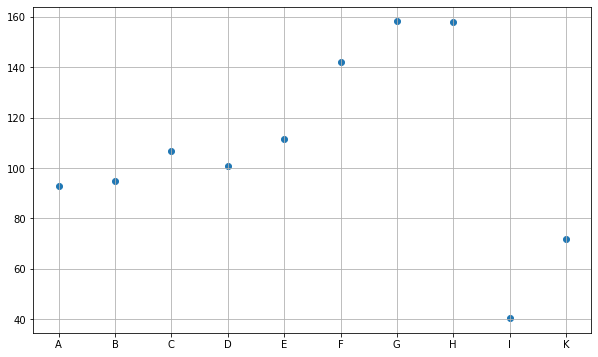

In [16]:
plt.figure(figsize=(10,6))
plt.grid()
df2=df_refined[['adr','is_canceled','reserved_room_type','assigned_room_type','hotel']][df_refined['is_canceled']==0]
df3=df2.groupby('assigned_room_type').mean()
plt.scatter(df3.index,df3.adr)
plt.xticks(df3.index)
plt.show()

[97.37234466939299, 94.18697253851317, 101.92419580419583, 116.01768741821073, 138.72623001230022, 171.03926866820638, 177.42920774647882, 0, 0, 71.76051136363635]
[80.0750090942156, 102.28833333333333, 107.2010387422798, 81.26339798763473, 100.97798574821846, 117.31074098360656, 148.9705162364697, 157.96264642082434, 40.55872881355931, 0]


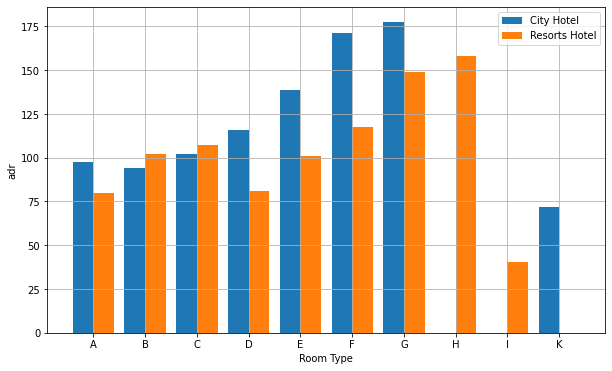

In [31]:
plt.figure(figsize=(10,6))
plt.grid()
df2=df_refined[['adr','is_canceled','reserved_room_type','assigned_room_type','hotel']][df_refined['is_canceled']==0]
room_types = list(df2.groupby('assigned_room_type').mean().index)
city_hotel=[]
resort_hotel=[]
#print(room_types)
for room_type in room_types:
    hotel_groupd=df2[df2['assigned_room_type']==room_type].groupby('hotel').mean()
    #print(hotel_groupd)
    try:
        city_hotel.append(hotel_groupd['adr'].loc['City Hotel'])
    except:
        city_hotel.append(0)
    try:
        resort_hotel.append(hotel_groupd['adr'].loc['Resort Hotel'])
    except:
        resort_hotel.append(0)
print(city_hotel)
print(resort_hotel)
X_axis = np.arange(len(room_types))
  
plt.bar(X_axis - 0.2, city_hotel, 0.4, label = 'City Hotel')
plt.bar(X_axis + 0.2, resort_hotel, 0.4, label = 'Resorts Hotel')
plt.xticks(X_axis, room_types)
plt.xlabel("Room Type")
plt.ylabel("adr")
#plt.title("Number of Guest in each hotel")
plt.legend()
plt.show()

### Question 3
Consider the non-cancelled bookings only.

#### (a)
Plot the mean values for `adr` by month. Show the values separately for each hotel. Also, ensure that the axis elements are appropriately ordered.

#### (b)
Plot the mean values for `adr` by day of the week. Show the values separately for each hotel. Also, ensure that the axis elements are appropriately ordered.



In [108]:
# Your code here (a)
df2=df_refined[['adr','arrival_date_month','hotel','arrival_date_year','arrival_date_week_number','arrival_date_day_of_month','children','adults','babies']][df_refined['is_canceled']==0]
df2['no_of_guest']=df2['children']+df2['adults']+df2['babies']

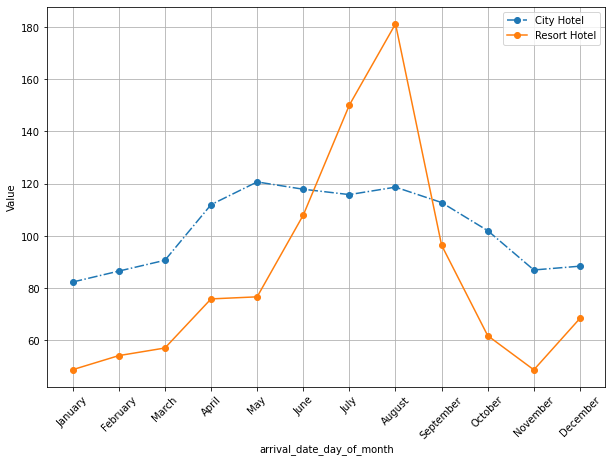

In [40]:
plt.figure(figsize=(10,7))
plt.grid()
months =  ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
city_hotel=[]
resort_hotel=[]
#print(room_types)
for month in months:
    hotel_groupd=df2[df2['arrival_date_month']==month].groupby('hotel').mean()
    #print(hotel_groupd)
    try:
        city_hotel.append(hotel_groupd['adr'].loc['City Hotel'])
    except:
        city_hotel.append(0)
    try:
        resort_hotel.append(hotel_groupd['adr'].loc['Resort Hotel'])
    except:
        resort_hotel.append(0)
        
plt.plot(months,city_hotel, '-.o',label='City Hotel')
plt.plot(months,resort_hotel, '-o',label='Resort Hotel')
plt.xlabel("arrival_date_day_of_month")
plt.ylabel("Value")
plt.xticks(months,rotation=45)
#plt.title('Plot the mean values for adr by day of the week. Show the values separately for each hotel. Also, ensure that the axis elements are appropriately ordered.')
plt.legend()

In [60]:
import datetime

In [127]:
df2

,adr,arrival_date_month,hotel,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,children,adults,babies,no_of_guest,date,date name
0,0.00,7,Resort Hotel,2015,27,1,0.0,2,0,2.0,2015-07-01,2
1,0.00,7,Resort Hotel,2015,27,1,0.0,2,0,2.0,2015-07-01,2
2,75.00,7,Resort Hotel,2015,27,1,0.0,1,0,1.0,2015-07-01,2
3,75.00,7,Resort Hotel,2015,27,1,0.0,1,0,1.0,2015-07-01,2
4,98.00,7,Resort Hotel,2015,27,1,0.0,2,0,2.0,2015-07-01,2
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,96.14,8,City Hotel,2017,35,30,0.0,2,0,2.0,2017-08-30,2
119386,225.43,8,City Hotel,2017,35,31,0.0,3,0,3.0,2017-08-31,3
119387,157.71,8,City Hotel,2017,35,31,0.0,2,0,2.0,2017-08-31,3
119388,104.40,8,City Hotel,2017,35,31,0.0,2,0,2.0,2017-08-31,3


In [114]:
def conversion(x):
    datetime_object = datetime.datetime.strptime(x, "%B")
    return datetime_object.month

df2['arrival_date_month'] = df2['arrival_date_month'].apply(conversion)

df2['arrival_date_month']=df2['arrival_date_month'].apply(lambda x: str(x))
df2['arrival_date_day_of_month']=df2['arrival_date_day_of_month'].apply(lambda x: str(x))
df2['arrival_date_year']=df2['arrival_date_year'].apply(lambda x: str(x))

df2['date']=df2['arrival_date_month']+'/'+df2['arrival_date_day_of_month']+'/'+df2['arrival_date_year']
df2['date']=pd.to_datetime(df2['date'])

df2['date name']=df2['date'].dt.weekday

dict_keys([0, 1, 2, 3, 4, 5, 6])


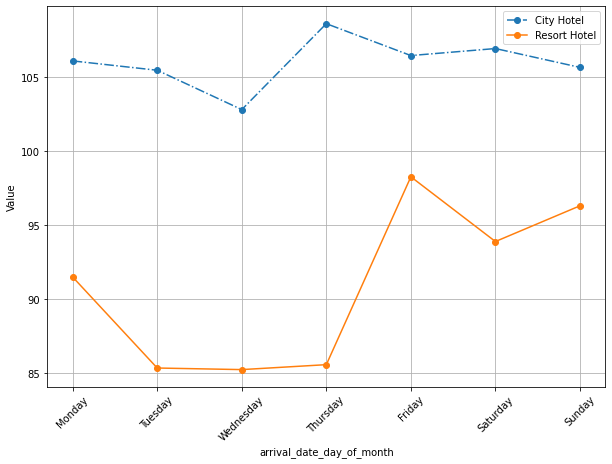

In [128]:
plt.figure(figsize=(10,7))
plt.grid()
days =  {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
city_hotel=[]
resort_hotel=[]
#print(room_types)
print(days.keys())
for day in days.keys():
    hotel_groupd=df2[df2['date name']==day].groupby('hotel').mean()
    #print(hotel_groupd)
    try:
        city_hotel.append(hotel_groupd['adr'].loc['City Hotel'])
    except:
        city_hotel.append(0)
    try:
        resort_hotel.append(hotel_groupd['adr'].loc['Resort Hotel'])
    except:
        resort_hotel.append(0)
        
plt.plot(days.values(),city_hotel, '-.o',label='City Hotel')
plt.plot(days.values(),resort_hotel, '-o',label='Resort Hotel')
plt.xlabel("arrival_date_day_of_month")
plt.ylabel("Value")
plt.xticks(list(days.values()),rotation=45)
#plt.title('Plot the mean values for adr by day of the week. Show the values separately for each hotel. Also, ensure that the axis elements are appropriately ordered.')
plt.legend()

### Question 4

Consider the non-cancelled bookings only.

#### (a)

Plot the guest counts by month. Show the values separately for each hotel. Also, ensure that the axis elements are appropriately ordered.

#### (b)
Plot the guest counts by day of the week. Show the values separately for each hotel. Also, ensure that the axis elements are appropriately ordered.

In [138]:
# Your code here (a)
df2

,adr,arrival_date_month,hotel,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,children,adults,babies,no_of_guest,date,date name
0,0.00,7,Resort Hotel,2015,27,1,0.0,2,0,2.0,2015-07-01,2
1,0.00,7,Resort Hotel,2015,27,1,0.0,2,0,2.0,2015-07-01,2
2,75.00,7,Resort Hotel,2015,27,1,0.0,1,0,1.0,2015-07-01,2
3,75.00,7,Resort Hotel,2015,27,1,0.0,1,0,1.0,2015-07-01,2
4,98.00,7,Resort Hotel,2015,27,1,0.0,2,0,2.0,2015-07-01,2
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,96.14,8,City Hotel,2017,35,30,0.0,2,0,2.0,2017-08-30,2
119386,225.43,8,City Hotel,2017,35,31,0.0,3,0,3.0,2017-08-31,3
119387,157.71,8,City Hotel,2017,35,31,0.0,2,0,2.0,2017-08-31,3
119388,104.40,8,City Hotel,2017,35,31,0.0,2,0,2.0,2017-08-31,3


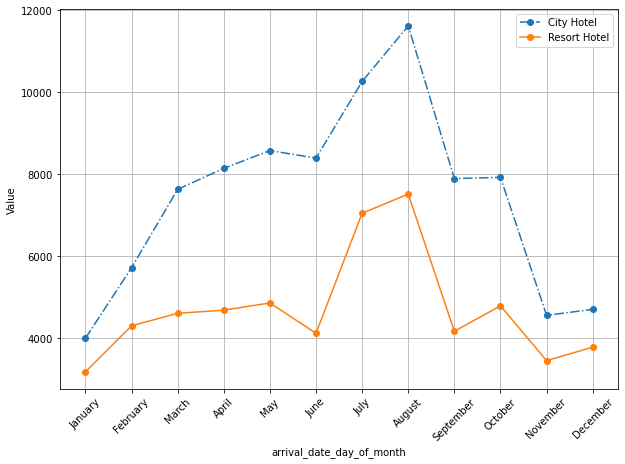

In [140]:
plt.figure(figsize=(10,7))
plt.grid()
months =  ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
city_hotel=[]
resort_hotel=[]
#print(room_types)
for i,month in enumerate(months):
    hotel_groupd=df2[df2['arrival_date_month']==str(i+1)].groupby('hotel').sum()

    try:
        city_hotel.append(hotel_groupd['no_of_guest'].loc['City Hotel'])
    except:
        city_hotel.append(0)
    try:
        resort_hotel.append(hotel_groupd['no_of_guest'].loc['Resort Hotel'])
    except:
        resort_hotel.append(0)
        
plt.plot(months,city_hotel, '-.o',label='City Hotel')
plt.plot(months,resort_hotel, '-o',label='Resort Hotel')
plt.xlabel("arrival_date_day_of_month")
plt.ylabel("Value")
plt.xticks(months,rotation=45)
#plt.title('Plot the mean values for adr by day of the week. Show the values separately for each hotel. Also, ensure that the axis elements are appropriately ordered.')
plt.legend()

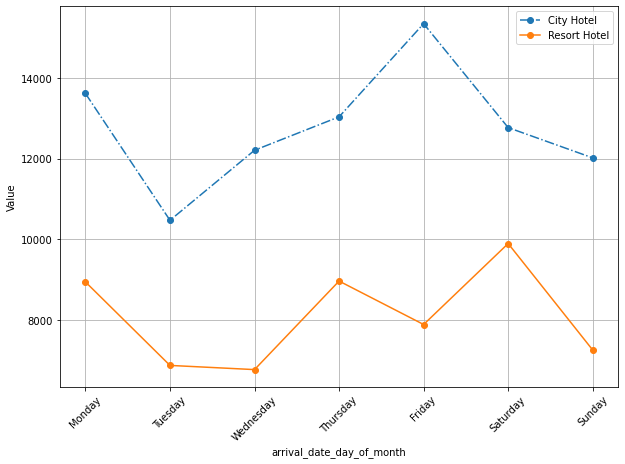

In [142]:
# Your code here (b)
plt.figure(figsize=(10,7))
plt.grid()
days =  {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
city_hotel=[]
resort_hotel=[]
for day in days.keys():
    hotel_groupd=df2[df2['date name']==day].groupby('hotel').sum()
    #print(hotel_groupd)
    try:
        city_hotel.append(hotel_groupd['no_of_guest'].loc['City Hotel'])
    except:
        city_hotel.append(0)
    try:
        resort_hotel.append(hotel_groupd['no_of_guest'].loc['Resort Hotel'])
    except:
        resort_hotel.append(0)
        
plt.plot(days.values(),city_hotel, '-.o',label='City Hotel')
plt.plot(days.values(),resort_hotel, '-o',label='Resort Hotel')
plt.xlabel("arrival_date_day_of_month")
plt.ylabel("Value")
plt.xticks(list(days.values()),rotation=45)
#plt.title('Plot the mean values for adr by day of the week. Show the values separately for each hotel. Also, ensure that the axis elements are appropriately ordered.')
plt.legend()

### Question 5

Consider the non-cancelled bookings only.

#### (a)
Plot the distribution of stay duration (in number of days) of guests at each hotel.

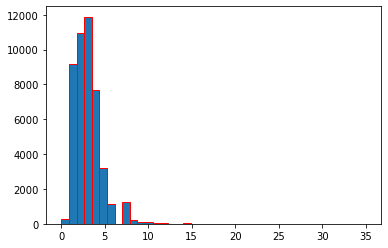

In [171]:
# Your code here (a)
df2=df_refined[['adr','arrival_date_month','hotel','arrival_date_year','arrival_date_week_number','arrival_date_day_of_month','children','adults','babies','reservation_status_date']][df_refined['is_canceled']==0]
df2['no_of_guest']=df2['children']+df2['adults']+df2['babies']

def conversion(x):
    datetime_object = datetime.datetime.strptime(x, "%B")
    return datetime_object.month

df2['arrival_date_month'] = df2['arrival_date_month'].apply(conversion)

df2['arrival_date_month']=df2['arrival_date_month'].apply(lambda x: str(x))
df2['arrival_date_day_of_month']=df2['arrival_date_day_of_month'].apply(lambda x: str(x))
df2['arrival_date_year']=df2['arrival_date_year'].apply(lambda x: str(x))

df2['checkin']=df2['arrival_date_month']+'/'+df2['arrival_date_day_of_month']+'/'+df2['arrival_date_year']
df2['checkin']=pd.to_datetime(df2['checkin'])
df2['reservation_status_date']=pd.to_datetime(df2['reservation_status_date'])

df2['stays_no_of_days']=(df2['reservation_status_date']-df2['checkin']).dt.days

df2['date name']=df2['checkin'].dt.weekday 
plt.hist(df2['stays_no_of_days'][df2['hotel']=='City Hotel'],bins=40,ec="red",range=[0,35])
plt.show()

### Question 6

#### (a), (b) & (c)
Make three visualizations, showing some interesting insights from the data. 

The visualizations should be accompanied by a brief textual description highlighting your finding.

['BB', 'HB', 'SC']


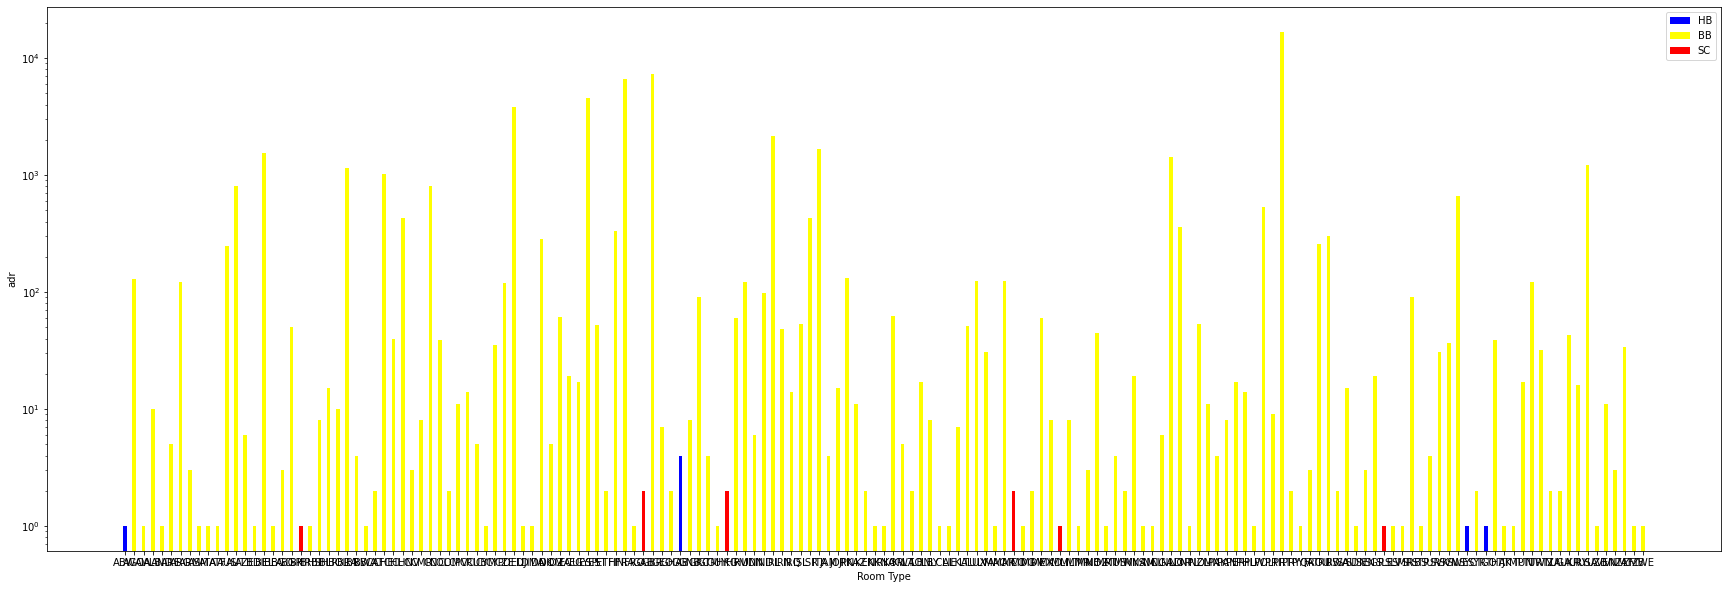

In [244]:
# Your code here (a)
#show meal orderd by customer belongs to specific countries
plt.figure(figsize=(30,10))
df2=df_refined[['meal','hotel','country']][(df_refined['is_canceled']==0) & (df_refined['meal']!='Undefined')]
countries=[]
meal=[]
count=[]
#df2.groupby('country').count().sort_values(by='hotel',ascending=False)
for key,df in df2.groupby('country'):
    #if key=='AUT':
    df3=df.groupby('meal').count().sort_values(by='country',ascending=False)[:1]['country']
    countries.append(key)
    meal.append(df3.keys()[0])
    count.append(df3.values[0])
# print(countries)
# print(meal)
# print(count)
color=list(set(meal))
print(color)
for c,m,c2 in zip(countries,meal,count):
    if m==color[0]:
        plt.bar(c,c2,0.4,color='yellow',label=m)
    elif m==color[1]:
        plt.bar(c,c2,0.4,color='blue',label=m)
    else:
        plt.bar(c,c2,0.4,color='red',label=m)
#     print(c,":",m,":",c2)
# plt.bar(countries, count, 0.4, label = 'City Hotel',)
# #plt.bar(X_axis + 0.2, resort_hotel, 0.4, label = 'Resorts Hotel')
# plt.xticks(countries, rotation=90)
plt.xlabel("Room Type")
plt.ylabel("adr")
plt.yscale('log')
# #plt.title("Number of Guest in each hotel")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.show()

[1, 128, 1, 10, 1, 5, 121, 3, 1, 1, 1, 247, 808, 6, 1, 1533, 1, 3, 50, 1, 1, 8, 15, 10, 1147, 4, 1, 2, 1020, 40, 426, 3, 8, 809, 39, 2, 11, 14, 5, 1, 35, 119, 3806, 1, 1, 286, 5, 61, 19, 17, 4534, 52, 2, 331, 6643, 1, 2, 7312, 7, 2, 4, 8, 90, 4, 1, 2, 60, 122, 6, 98, 2144, 48, 14, 53, 426, 1668, 4, 15, 132, 11, 2, 1, 1, 62, 5, 2, 17, 8, 1, 1, 7, 51, 124, 31, 1, 124, 2, 1, 2, 60, 8, 1, 8, 1, 3, 45, 1, 4, 2, 19, 1, 1, 6, 1429, 357, 1, 53, 11, 4, 8, 17, 14, 1, 537, 9, 16685, 2, 1, 3, 259, 303, 2, 15, 1, 3, 19, 1, 1, 1, 90, 1, 4, 31, 37, 661, 1, 2, 1, 39, 1, 1, 17, 121, 32, 2, 2, 43, 16, 1225, 1, 11, 3, 34, 1, 1]


In [20]:
# Your code here (b)

In [20]:
# Your code here (c)

## Part B - Pre-processing

For this part, **you are required to document the reasoning behind all the data transformations you devise and the insights you gain from each question.** Create **markdown cells** to add your answers. 

### Task Description

The task is to classify whether a booking will be cancelled or not. 


### Question 1
**Feature Selection**

#### (a)
List the features which seem to contribute to data leakage. These will be the features which are related to the predicitve target, but would not be available at prediction time in a real-world setting. 

#### (b)
Find out the percent of missing values of each column and visualize using [missingno](https://github.com/ResidentMario/missingno) . Which features have too many missing values? And which features have sufficiently low number of missing values, such that they can be safely imputed without significantly affecting the overall data distribution.

#### (c)
Visualize the correlations among the different input features.

#### (d)
Find out the correlation of each of the input features with the target attribute.

#### (e)
Using your answers to the previous parts, filter out the irrelevant features from the dataset.

Remember to document your findings for each part.

In [21]:
# Your code here (a)

In [22]:
# Your code here (b)

In [23]:
# Your code here (c)

In [24]:
# Your code here (d)

In [25]:
# Your code here (e)

### Question 2

For this question, use sklearn transformations. 

Develop appropriate encoding and scaling steps for the categorical and numerical columns in your dataset respectively. 

For this question, a single sklearn `Transformer` should be developed which can be applied for the entire dataset.
If separate transformations need to be applied for different columns, then compose them into a single transformation using sklearn's `ColumnTransformer`.  

In [32]:
# Your code here

## Part C - Modeling

Now, you will be training different ML models to perform the required predictive task. Specifically, the following classification models will be trained:
* kNN
* Naive Bayes
* Decision tree
* [xgboost](https://xgboost.readthedocs.io/en/latest/python/python_api.html) 

### Question 1

Split your data into training and testing data, with 85% of the dataset going to testing data. Set a suitable seed value so that the splits are reproducible

In [34]:
### Your code here

### Question 2

For each of the required models perform the following tasks:
* Compose an sklearn pipeline with the developed pre-processing (developed in the previous part) and the model.
* Train the model with default hyper-parameters and report its evlauation score on the test set.
* Tune the hyper-parameters of the model with `GridSearchCV`.
* Report the accuracy, balanced accuracy, F1, ROC AUC and average predicion scores of the best model on the test set.

#### kNN

In [35]:
### Your code here

In [36]:
### Your code here

In [ ]:
### Your code here

#### Naive Bayes

In [35]:
### Your code here

In [36]:
### Your code here

In [ ]:
### Your code here

#### Decision Tree

In [35]:
### Your code here

In [36]:
### Your code here

In [ ]:
### Your code here

#### xgboost

In [35]:
### Your code here

In [36]:
### Your code here

In [37]:
### Your code here

### Question 3

#### (a)
Plot a bar chart showing the results of the different models (the tuned ones). Show the following metrics:
* Accuracy
* Balanced accuracy
* F1 score
* ROC AUC 
* Average precision

#### (b)
Describe your results for different models and your performance in comparison to the random selection baseline.

#### (c)
Which of the above is the most suitable metric for evaluation in this case? Justify your answer. Now with that metric, select which model performed the best? This model is now your best overall model.

In [ ]:
### Your code here (a)

Your answer to (b) here

Your answer to (c) here

### Question 4
Using your best overall model, plot the following:

#### (a)
Confusion Matrix (appropriate labels should be shown)

#### (b)
Precision Recall curve

#### (c)
ROC curve (Also show ROC for random classifier on the same plot)

In [172]:
import os

In [ ]:
os.listdir()